In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

input/games.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
games = pd.read_csv("input/games.csv")

In [3]:
games.head(2)

id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   

  increment_code  white_id  white_rating   black_id  black_rating  \
0           15+2  bourgris          1500       a-00          1191   
1           5+10      a-00          1322  skinnerua          1261   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   

                             opening_name  opening_ply  
0        Slav Defense: Exchange Variation            5  
1  Nimzowitsch Defense: Kennedy Variation            4

## Categorizing According to Time Format

### Two player games generally have certain well distinguished time formats. For this dataset, to further dig deeper in this analysis - we'll be categorizing the time format in 3 categories (following chess.com rules)

In [4]:
games['increment_code']

0         15+2
1         5+10
2         5+10
3         20+0
4         30+3
         ...  
20053    10+10
20054     10+0
20055     10+0
20056     10+0
20057     10+0
Name: increment_code, Length: 20058, dtype: object

In [5]:
#Splitting the increment_code into two columns "Base_Time" and "Increment"
games['game_category'] = games['increment_code'].str.split('+').str[0]
games['increment'] = games['increment_code'].str.split('+').str[1]

games['game_category'] = games['game_category'].astype(int)
games['increment'] = games['increment'].astype(int)

#This approach is more like a short-cut and not a very generalized approach. This will be fixed soon.
games['game_category'][games['game_category'] >= 10] = 11
games['game_category'][games['game_category'] < 3] = 2
games['game_category'][(games['game_category'] >= 3) & (games['game_category'] < 10)] = 5

games['game_category'].replace(11, 'rapid', inplace = True)
games['game_category'].replace(2, 'bullet', inplace = True)
games['game_category'].replace(5, 'blitz', inplace = True)

<ipython-input-5-6393a456dcb6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['game_category'][games['game_category'] >= 10] = 11
<ipython-input-5-6393a456dcb6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['game_category'][games['game_category'] < 3] = 2
<ipython-input-5-6393a456dcb6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['game_category'][(games['game_category'] >= 3) & (games['game_category'] < 10)

In [6]:
games['game_category'].value_counts()

rapid     15988
blitz      3939
bullet      131
Name: game_category, dtype: int64

In [7]:
games['game_category'].unique()

array(['rapid', 'blitz', 'bullet'], dtype=object)

## **Distribution of the number of turns taken:**

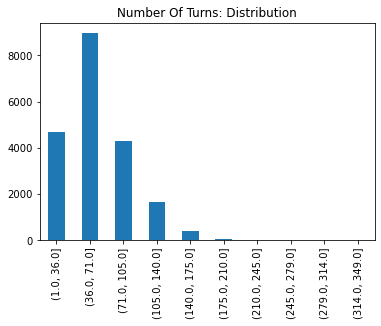

In [8]:
ax = pd.cut(games['turns'], 10, precision=0).value_counts().sort_index().plot.bar()
ax_attr = ax.set(title = "Number Of Turns: Distribution")

### We can see that majority of games concluded in less than 71 moves and almost all the games have less than 175 moves.

## Distribution of the victory status:

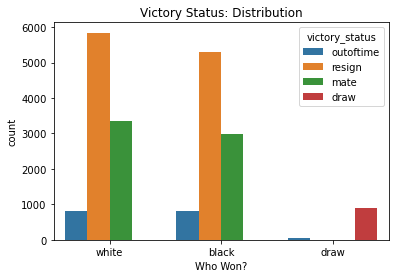

In [9]:
#games['victory_status'].value_counts().plot.bar()
ax = sns.countplot( x = 'winner', hue = 'victory_status', data = games)
ax_attr = ax.set(xlabel = 'Who Won?', title = 'Victory Status: Distribution')

### In the above plot, the reader might wonder why there's a small section of "out-of-time" games in the "Draw" section. This is interesting, because this brings our attention to one of the rare happenings in the game of Chess. According to one of the FIDE Rules:

#### "Except where one of the Articles: 5.1.a, 5.1.b, 5.2.a, 5.2.b, 5.2.c applies, if a player does not complete the prescribed number of moves in the allotted time, the game is lost by the player. However, the game is drawn, if the position is such that the opponent cannot checkmate the player’s king by any possible series of legal moves."

### That small section of games fall in the same category.


## Distribution of the player ratings:

#### The dataset has categorized the ratings according to the color with which the player is competing. To keep the analysis clean, we'll have a look at the following:

1. The average rating for both black and white.
2. Distribution of black's rating.
3. Distribution of white's rating.
4. The average rating for black - when the player won and when the player lost.
5. The average rating for white - when the player won and when the player lost.


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Average Rating of White is: 1596.6318675840064
Average rating of Black is: 1588.8319872370128


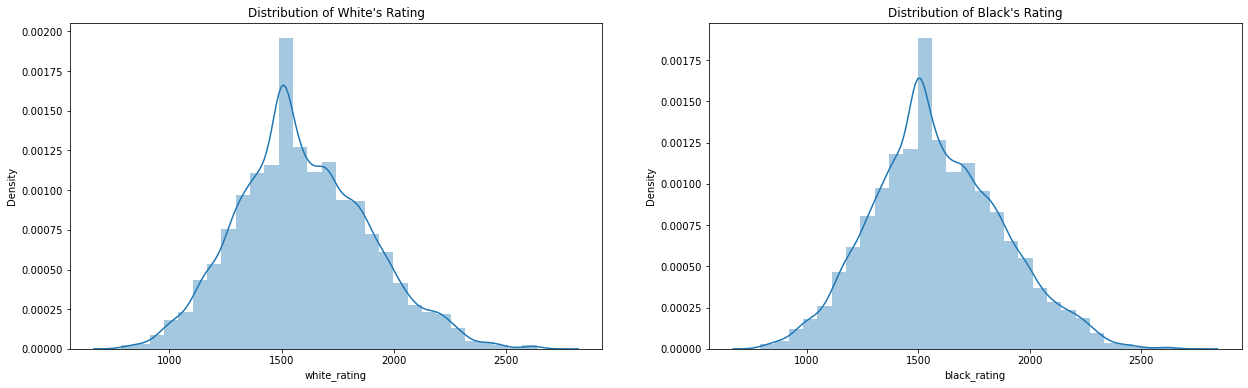

In [10]:
a4_dims = (21, 6)
fig, ax = plt.subplots(1,2,figsize=a4_dims)

#Distribution of white's rating
sns.distplot(games['white_rating'], bins = 30, ax = ax[0])
#Distribution of black's rating
sns.distplot(games['black_rating'], bins = 30, ax = ax[1])

ax_attr = ax[0].set(title = "Distribution of White's Rating")
ax_attr = ax[1].set(title = "Distribution of Black's Rating")

#average rating of white
print('Average Rating of White is:',games['white_rating'].mean())

#average rating of black
print('Average rating of Black is:',games['black_rating'].mean())

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


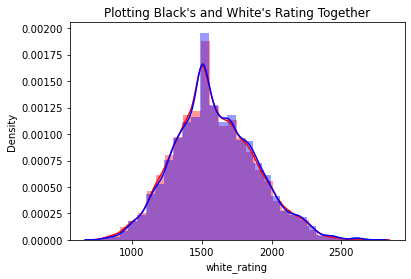

In [11]:
#plotting black and white together to compare the scale of their distribution
ax = sns.distplot(games['black_rating'], bins = 30, color = 'r')
ax1 = sns.distplot(games['white_rating'], bins = 30, color = 'b')
ax_attr = ax.set(title = "Plotting Black's and White's Rating Together")

#### From the above plot, it's evident that the distribution of rating for White and Black is pretty similar. Hence there's no rating-bias in the overall dataset.

To analyse the rating distribution according to the color which won, let's have a look at the
## **Distribution of data according to the Winner.**

The average rating of Black when Black won = 1638.227297683101
The average rating of Black when Black lost = 1538.876712328767
The average rating of White when White won = 1634.1841815818418
The average rating of White when White lost= 1549.2461842538708


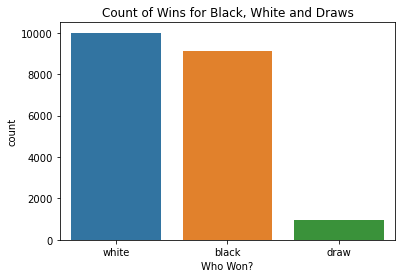

In [12]:
#games['winner'].value_counts().plot.bar()
ax = sns.countplot( x = games['winner'], data = games)
ax.set(xlabel = 'Who Won?', title = 'Count of Wins for Black, White and Draws')

black_black = games['black_rating'][games['winner'] == 'black'].mean()
black_white = games['black_rating'][games['winner'] == 'white'].mean()
white_black = games['white_rating'][games['winner'] == 'black'].mean()
white_white = games['white_rating'][games['winner'] == 'white'].mean()
print("The average rating of Black when Black won =", black_black)
print("The average rating of Black when Black lost =", black_white)
print("The average rating of White when White won =", white_white)
print("The average rating of White when White lost=", white_black)

#### Even though rating isn't the best indicator, from the above results we can infer that the average player rating of both White and Black is similar when each of them won or lost. (W 1638 and B 1634 when they won, W 1538 and B 1549 when they lost)

##  **Distribution of the rating-difference in each match.**

In [13]:
#adding a new column which stores the rating difference between black and white

games["Rating_Diff"] = abs(games['white_rating'] - games['black_rating'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


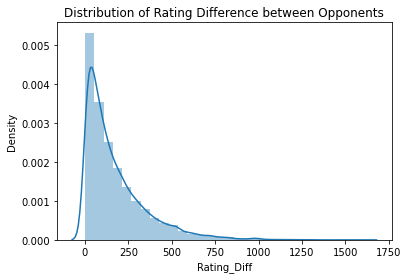

In [14]:
#plotting the distribution of rating difference
#pd.cut(games["Rating_Diff"], 30, precision = 0).value_counts().sort_index().plot.bar()
ax = sns.distplot(games["Rating_Diff"], bins = 30)
ax_attr = ax.set(title = "Distribution of Rating Difference between Opponents")

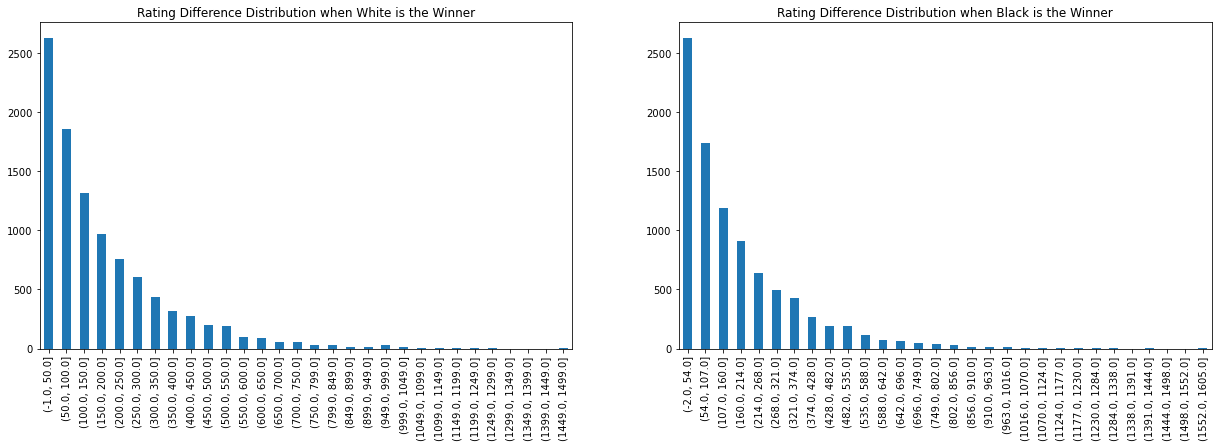

In [15]:
a4_dims = (21, 6)
fig, ax = plt.subplots(1,2,figsize=a4_dims)

#plotting the rating difference distribution when white won
chart1 = pd.cut(games["Rating_Diff"][games['winner'] == 'white'], 30, precision = 0).value_counts().sort_index().plot.bar(ax = ax[0])
ax_attr = chart1.set(title = "Rating Difference Distribution when White is the Winner")

#plotting the rating difference distribution when black won
chart2 = pd.cut(games["Rating_Diff"][games['winner'] == 'black'], 30, precision = 0).value_counts().sort_index().plot.bar(ax = ax[1])
ax_attr = chart2.set(title = "Rating Difference Distribution when Black is the Winner")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


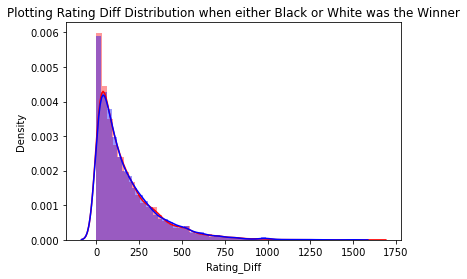

In [16]:
#plotting the Rating_Diff distribution for white and black together to compare the scales of both and gain some inference
ax = sns.distplot(games['Rating_Diff'][games['winner'] == 'black'], color = 'red')
ax1 = sns.distplot(games['Rating_Diff'][games['winner'] == 'white'], color = 'blue')
ax_attr = ax.set(title = "Plotting Rating Diff Distribution when either Black or White was the Winner")

#### The plot above shows the rating distribution of both White and Black (when they were victorious) and we can verify our earlier inference that the rating distribution is uniform and doesn't contain any bias.

### "A chess opening or simply an opening refers to the initial moves of a chess game. The term can refer to the initial moves by either side, White or Black, but an opening by Black may also be known as a defense. There are dozens of different openings, and hundreds of variants." (Source: https://en.wikipedia.org/wiki/Chess_opening)

### Now we shall try to explore whether the openings played in each match has any impact on the outcome of the match or not. 
### We will also try to see the impact of the opening played for both black and white.

## Distribution of the openings played:

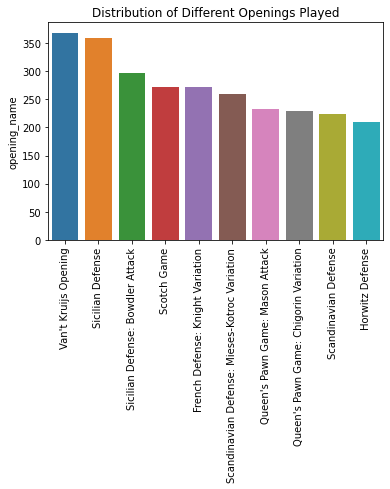

In [17]:
opening_dist = games['opening_name'].value_counts()

#plotting the top 30 opening played
#opening_dist[:30].plot.bar()

#sns.countplot(games['opening_name'])
chart = sns.barplot( x = opening_dist.index[:10], y = opening_dist[:10])
ax_attr = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
ax_attr = chart.set(title = "Distribution of Different Openings Played")


### Having seen the Top 10 openings of the complete dataset doesn't bring us to any concrete conclusion. Instead, lets look at the most common openings played by White and Black - whenever they won a game.

### Count of openings which lead to a Win for Black/ Win for White

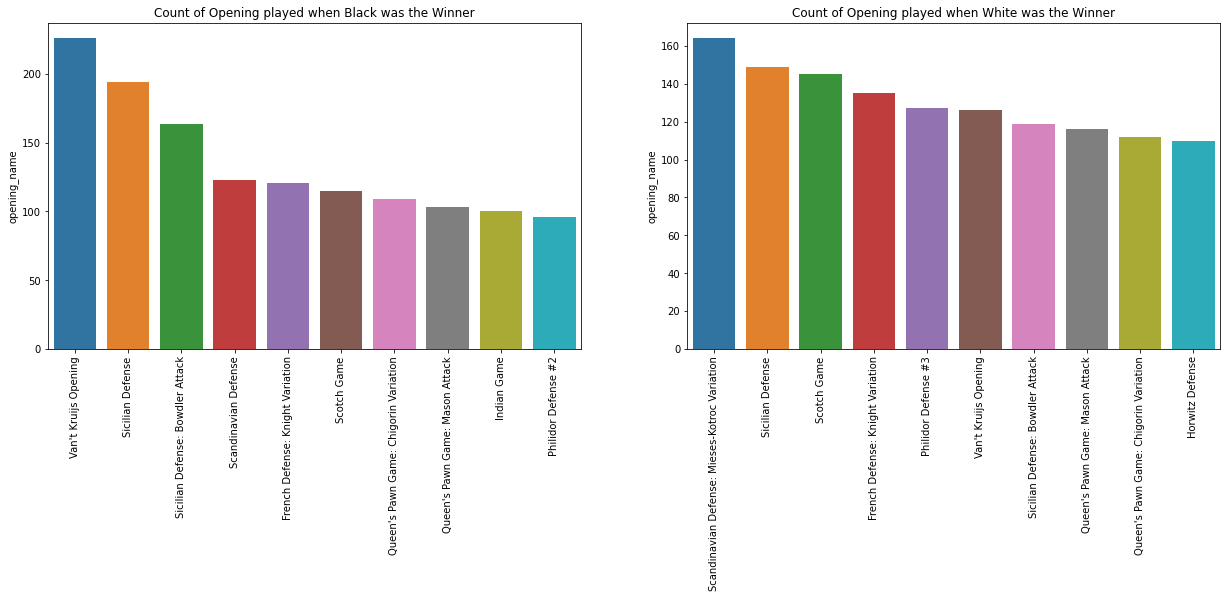

In [18]:
a4_dims = (21, 6)
fig, ax = plt.subplots(1,2,figsize=a4_dims)

#count of openings which lead to a win for black
winning_openings_black = games['opening_name'][games['winner'] == 'black'].value_counts()

#plotting the top 10 openings which lead to a win for black/lead to a loss for white
#winning_openings_black[:10].plot.bar()

chart = sns.barplot( x = winning_openings_black.index[:10], y = winning_openings_black[:10], ax = ax[0])
ax_attr = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
ax_attr = chart.set(title ="Count of Opening played when Black was the Winner")


#count of openings which lead to a win for white
winning_openings_white = games['opening_name'][games['winner'] == 'white'].value_counts()

#plotting top 10 openings which lead to a win for white/lead to a loss for black
#winning_openings_white[:10].plot.bar()
chart = sns.barplot( x = winning_openings_white.index[:10], y = winning_openings_white[:10], ax = ax[1])
ax_attr = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
ax_attr = chart.set(title = "Count of Opening played when White was the Winner")

#### We can see that the most common opening with played which helped white to win is "Scandinavian Defense". However, the most common opening will naturally have the most number of wins as well, so this doesn't give us a clear information about which opening actually proved to be the most efficient in getting a win.

#### To figure out the most efficient opening, let's look at the win percentage.

In [19]:
#Collating the top 10 openings for white and black
winning_openings_white_top10 = winning_openings_white[:10]
winning_openings_black_top10 = winning_openings_black[:10]

#Getting the Data of the Top 10 Openings for White and Black in a separate DataFrame for each
openingSetWhite = games[games['opening_name'].isin(winning_openings_white_top10.index)]
openingSetBlack = games[games['opening_name'].isin(winning_openings_black_top10.index)]

#Getting the count of each opening for White in 'total_count_white'
# & Getting the count of each opening for White where White is the winner in 'total_count_white_winner'
total_count_white = openingSetWhite.groupby('opening_name').count()
total_count_white_winner = openingSetWhite[openingSetWhite['winner'] == 'white'].groupby('opening_name').count()

#Getting the count of each opening for Black in 'total_count_black'
# & Getting the count of each opening for Black where Black is the winner in 'total_count_black_winner'
total_count_black = openingSetBlack.groupby('opening_name').count()
total_count_black_winner = openingSetBlack[openingSetBlack['winner'] == 'black'].groupby('opening_name').count()

#Calculating winning percentage for the top 10 openings for Black and White each
winning_perc_white = (total_count_white_winner/total_count_white)*100
winning_perc_black = (total_count_black_winner/total_count_black)*100

## Top 10 Most Efficient Openings for White & Black (highest winning %)

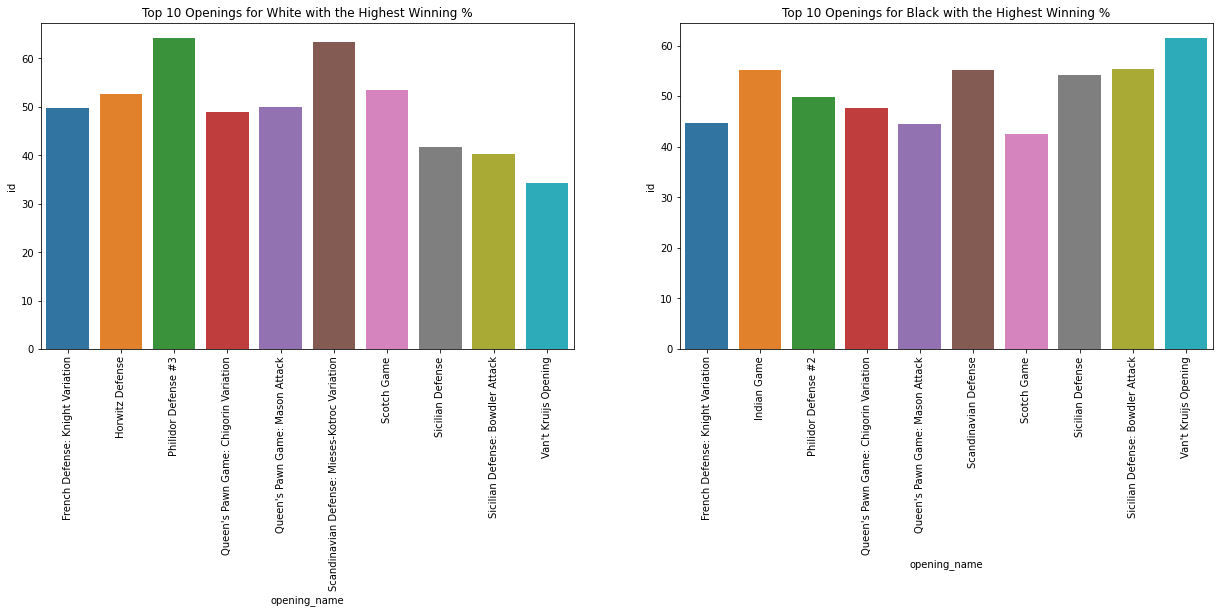

In [20]:
a4_dims = (21, 6)
fig, ax = plt.subplots(1,2,figsize=a4_dims)

chart1 = sns.barplot(x=winning_perc_white.index , y=winning_perc_white.id, ax = ax[0])
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
ax_attr = chart1.set(title = 'Top 10 Openings for White with the Highest Winning %')

chart2 = sns.barplot(x=winning_perc_black.index , y=winning_perc_black.id, ax = ax[1])
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
ax_attr = chart2.set(title = 'Top 10 Openings for Black with the Highest Winning %')

## Exploring the dataset based on Game Category (Rapid, Blitz or Bullet)

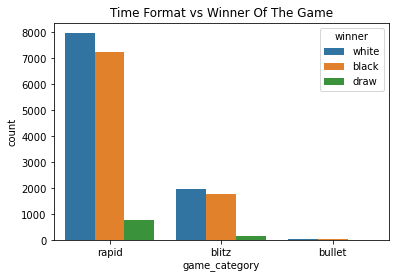

In [21]:
ax = sns.countplot( x = 'game_category', hue = 'winner', data = games)
ax_attr = ax.set(title = "Time Format vs Winner Of The Game")

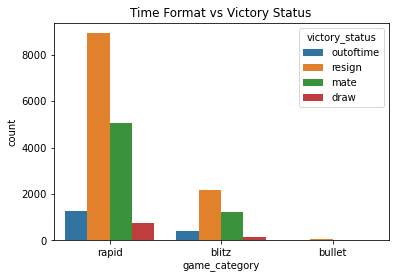

In [22]:
ax = sns.countplot( x = 'game_category', hue = 'victory_status', data = games)
ax_attr = ax.set(title = "Time Format vs Victory Status")

In [23]:
hue_order = games['victory_status'].unique()

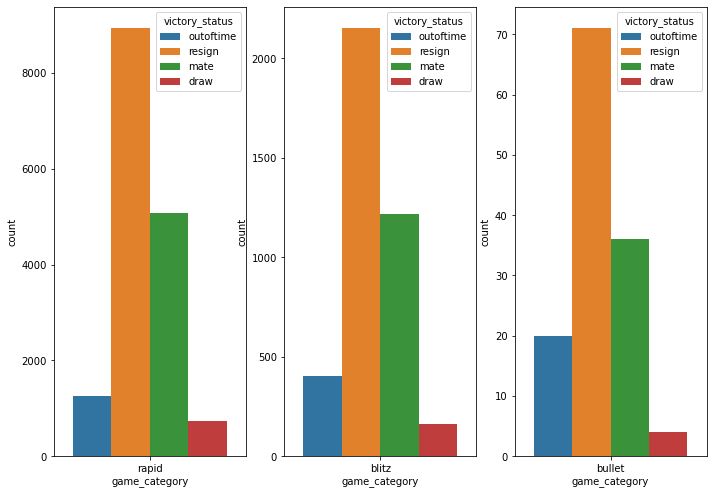

In [24]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(1,3,figsize=a4_dims)
#ax.set(xlabel = 'Time Format', ylabel = 'Count', title = 'Victory Status ')
sns.countplot( x = 'game_category', hue = 'victory_status', data = games[games['game_category'] == 'rapid'], hue_order = hue_order, ax = ax[0])
sns.countplot( x = 'game_category', hue = 'victory_status', data = games[games['game_category'] == 'blitz'], hue_order = hue_order, ax = ax[1])
sns.countplot( x = 'game_category', hue = 'victory_status', data = games[games['game_category'] == 'bullet'], hue_order = hue_order, ax = ax[2])

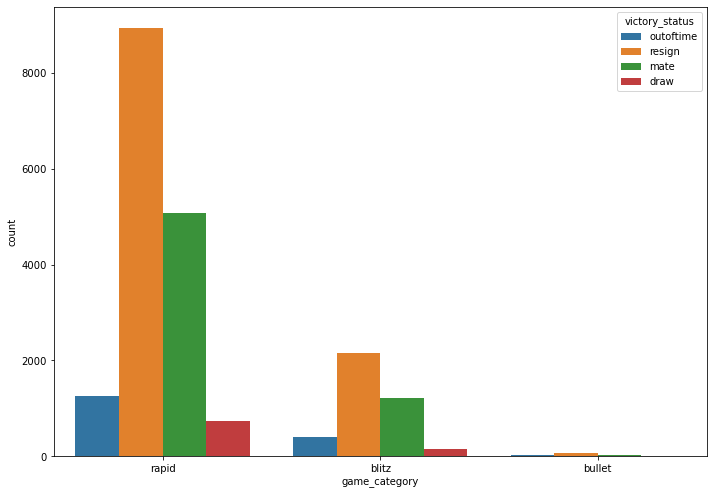

In [25]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(1,figsize=a4_dims)
#ax.set(xlabel = 'Time Format', ylabel = 'Count', title = 'Victory Status ')
sns.countplot( x = 'game_category', hue = 'victory_status', data = games, hue_order = hue_order)
#sns.countplot( x = 'game_category', hue = 'victory_status', data = games[games['game_category'] == 'blitz'], hue_order = hue_order, ax = ax[1])
#sns.countplot( x = 'game_category', hue = 'victory_status', data = games[games['game_category'] == 'bullet'], hue_order = hue_order, ax = ax[2])

## Who are the Top Players?

In [26]:
games.head(2)

id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   

  increment_code  white_id  white_rating   black_id  black_rating  \
0           15+2  bourgris          1500       a-00          1191   
1           5+10      a-00          1322  skinnerua          1261   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   

                             opening_name  opening_ply game_category  \
0        Slav Defense: Exchange Variation            5         rapid   
1  Nimzowitsch Defense: Kennedy Variation            4         blitz   

   increment  Rating_Diff  
0          2          309  
1         10           61

In [27]:
games['Rating_Diff_Sign'] = games['white_rating'] - games['black_rating']
games['Sign'] = ''
bool_pos = games['Rating_Diff_Sign'][games['Rating_Diff_Sign'] > 0]

In [28]:
topWhitePlayers = games['white_id'][games['winner'] == 'white'].value_counts()
topBlackPlayers = games['black_id'][games['winner'] == 'black'].value_counts()

In [29]:
df = pd.DataFrame(topWhitePlayers.append(topBlackPlayers), columns = ['Matches_Won'])
df.sort_values(by = ['Matches_Won'], ascending = False, inplace = True)

In [30]:
df['Player_ID'] = df.index

In [31]:
top_players = df.groupby('Player_ID').sum().reset_index()
top_players.sort_values('Matches_Won', ascending=False, inplace = True)

In [32]:
top_players[:10]

Player_ID  Matches_Won
7700             taranga           72
8386  vladimir-kramnik-1           50
24         a_p_t_e_m_u_u           46
1564           chesscarl           45
2314        ducksandcats           43
4289            king5891           42
2253          doraemon61           38
480           anakgreget           36
7354           smilsydov           36
7995              tori92           34